#                                            Pokemon Project

#### Nowadays in the hustle of life, all of us miss our carefree childhood days when life was not so dynamic and stressful. Nostalgia holds a very special place in all of our hearts as everyone wants to revert back time and live those days just one more time.

#### So, as an attempt to bring our childhood back we bring this project which deals with an integral part of our childhood that is Pokemon. We have tried to analyse the different pokemons with our data analysis skills and later on make a machine learning model which will create a Pokemon dream team.

#### This dataset contains information on all 802 Pokemon from all Seven Generations of Pokemon. The information contained in this dataset include Base Stats, Performance against Other Types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc. The information was scraped from http://serebii.net/

### Content
#### name: The English name of the Pokemon
#### japanese_name: The Original Japanese name of the Pokemon
#### pokedex_number: The entry number of the Pokemon in the National Pokedex
#### percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
#### type1: The Primary Type of the Pokemon
#### type2: The Secondary Type of the Pokemon
#### classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex
#### height_m: Height of the Pokemon in metres
#### weight_kg: The Weight of the Pokemon in kilograms
#### capture_rate: Capture Rate of the Pokemon
#### baseeggsteps: The number of steps required to hatch an egg of the Pokemon
#### abilities: A stringified list of abilities that the Pokemon is capable of having
#### experience_growth: The Experience Growth of the Pokemon
#### base_happiness: Base Happiness of the Pokemon
#### against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type
#### hp: The Base HP of the Pokemon
#### attack: The Base Attack of the Pokemon
#### defense: The Base Defense of the Pokemon
#### sp_attack: The Base Special Attack of the Pokemon
#### sp_defense: The Base Special Defense of the Pokemon
#### speed: The Base Speed of the Pokemon
#### generation: The numbered generation which the Pokemon was first introduced
#### is_legendary: Denotes if the Pokemon is legendary.

In [1]:
#importing the necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#storing the data in the poke_df dataframe 
poke_df= pd.read_csv('C:/Users/Shivam Shandilya/Desktop/pokemon/pokemon.csv')

In [4]:
poke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [5]:
poke_df.iloc[:,19:].head()

,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


### Data Cleaning

In [6]:
#Finding Out the number of missing/null values
poke_df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


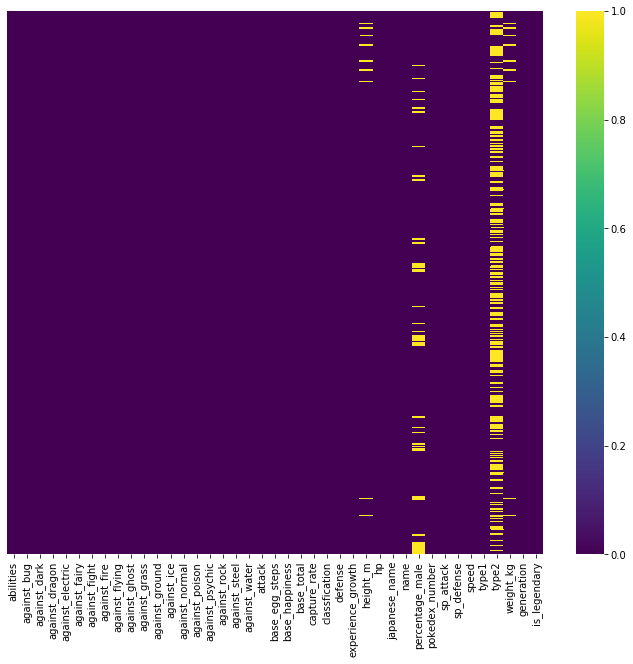

In [7]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(poke_df.isnull(),yticklabels=False,cmap='viridis')

### Filling the missing height values

In [8]:
#First off, we will find the different primary types of pokemon and group them according to it
poke_df['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [9]:
#Finding out the average height of a Pokemon according to its type
mean_height= poke_df.groupby('type1')['height_m'].mean()
mean_height

type1
bug         0.883333
dark        1.296552
dragon      1.937037
electric    0.981579
fairy       0.794444
fighting    1.196429
fire        1.168000
flying      1.166667
ghost       1.251852
grass       0.938961
ground      1.340741
ice         1.208696
normal      1.024752
poison      1.160000
psychic     1.063462
rock        1.304878
steel       1.875000
water       1.283333
Name: height_m, dtype: float64

In [10]:
#Finding the mean height of a bug type Pokemon
mean_height['bug']

0.8833333333333332

In [11]:
def avg_height (type, height):
    if np.isnan(height):
        return mean_height[type]
    else:
        return height

In [12]:
#Now we will fill in the missing height values with the average height of the type of the pokemon it is with the help of avg_height function
poke_df['height_m'] = poke_df.apply(lambda x: avg_height(x.type1, x.height_m), axis=1)

In [13]:
#Checking the presence of null values in height_m column
poke_df.isnull().sum()['height_m']

0

### Filling the missing percentage_male values

In [14]:
#Since the genderless pokemons have blank percentage_male values, we will substitute those none values with 0
poke_df['percentage_male']= poke_df['percentage_male'].apply(lambda x: 0 if np.isnan(x) else x)

In [15]:
#Checking the presence of null values in percentage_male column
poke_df.isnull().sum()['percentage_male']

0

### Filling the missing weight values

In [16]:
#Finding the average weight per pokemon type
mean_weight = poke_df.groupby('type1')['weight_kg'].mean()
mean_weight

type1
bug          33.083333
dark         69.096552
dragon      107.125926
electric     37.944737
fairy        23.555556
fighting     58.675000
fire         66.096000
flying       52.000000
ghost        69.570370
grass        33.255844
ground      150.044444
ice         103.260870
normal       46.158416
poison       33.830000
psychic      57.328846
rock         92.946341
steel       188.841667
water        51.071930
Name: weight_kg, dtype: float64

In [17]:
mean_weight['bug']

33.08333333333334

In [18]:
def avg_weight(type, weight):
    if (np.isnan(weight)):
        return mean_weight[type]
    else:
        return weight

In [19]:
#Filling the missing values with average weight according to that pokemon's type
poke_df['weight_kg']= poke_df.apply(lambda x: avg_weight(x.type1, x.weight_kg), axis=1)

In [20]:
#Checking null values in weight_kg column
poke_df.isnull().sum()['weight_kg']

0

### Dropping the type2 column

In [21]:
#Since there is a large number of type2 data missing, we will drop it. As we have the type1 column, dropping the type2 column won't make a big differnce
poke_df.drop('type2', axis=1, inplace=True)

In [22]:
#Checking the cleaned dataset
poke_df.isnull().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

# OUR DATA IS NOW CLEAN

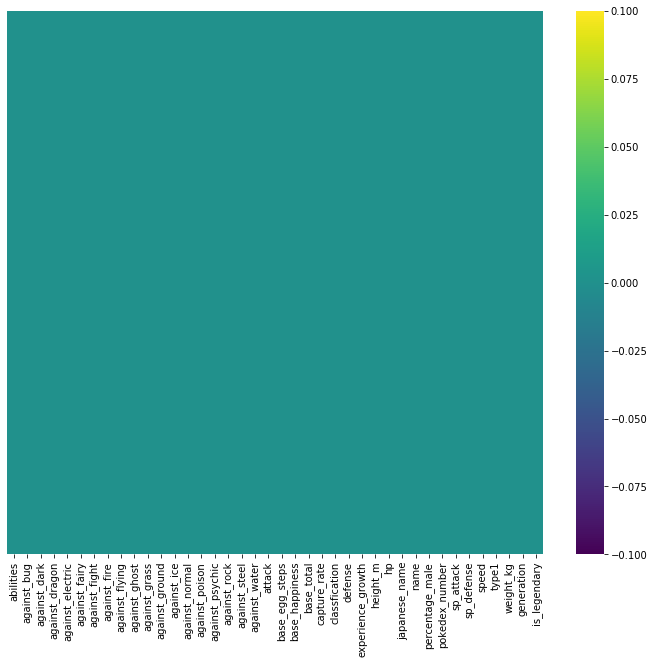

In [24]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(poke_df.isnull(),yticklabels=False,cmap='viridis')

## EXPOLATORY  DATA   ANALYSIS

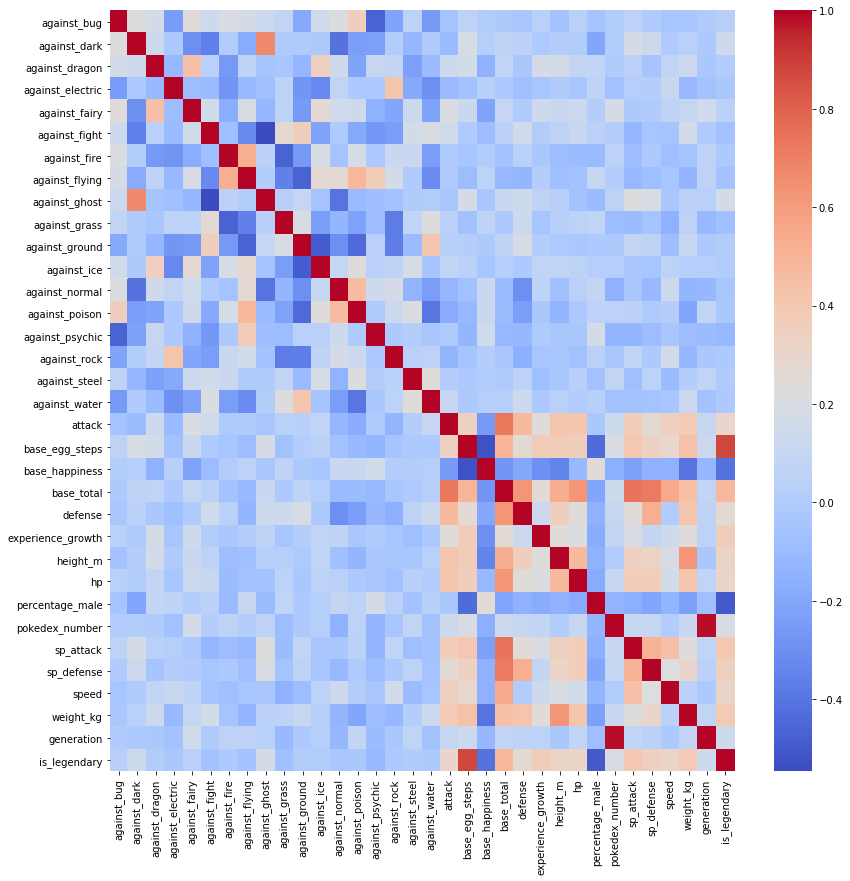

In [26]:
fig=plt.figure(figsize=(14,14))
sns.heatmap(poke_df.corr(),cmap='coolwarm',annot=False)


#### How does height and weight of a Pokemon correlate with its various base stats?

In [27]:
poke_df.corr()[['height_m', 'weight_kg']]

,height_m,weight_kg
against_bug,-0.061089,-0.032426
against_dark,0.017138,0.035865
against_dragon,0.164451,0.126091
against_electric,0.000997,-0.110712
against_fairy,0.114907,0.097847
against_fight,0.058836,0.160718
against_fire,-0.086357,-0.046338
against_flying,-0.073466,-0.128664
against_ghost,0.031694,0.046942
against_grass,0.033080,0.059733


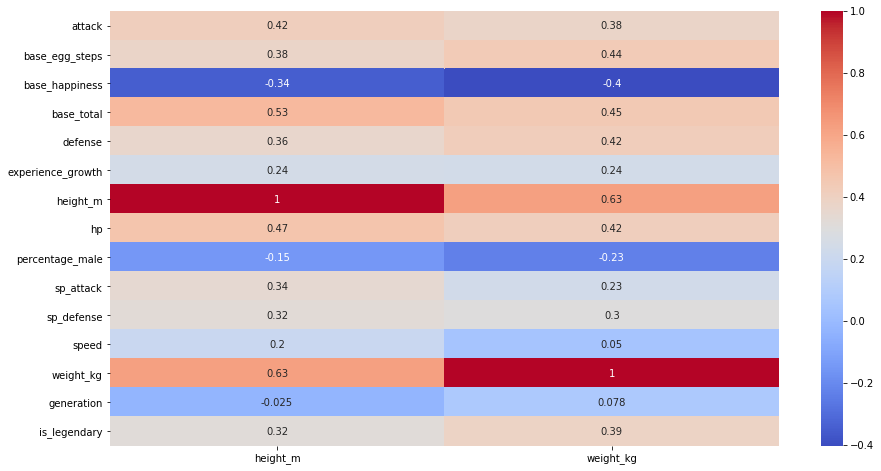

In [28]:
#Heatmap of the most relevant features with respect to the height and weight of the pokemon
plt.figure(figsize=(15,8))
sns.heatmap(poke_df.corr()[['height_m', 'weight_kg']].iloc[18:].drop('pokedex_number'), annot=True, cmap='coolwarm')

#### What factors influence the Experience Growth and Egg Steps? Are these quantities correlated?

In [29]:
poke_df.corr()[['experience_growth', 'base_egg_steps']].iloc[18:]

,experience_growth,base_egg_steps
attack,0.241087,0.331088
base_egg_steps,0.373837,1.000000
base_happiness,-0.295348,-0.524551
base_total,0.256930,0.496466
defense,0.129698,0.265230
experience_growth,1.000000,0.373837
height_m,0.244636,0.376916
hp,0.214068,0.359218
percentage_male,-0.172634,-0.435959
pokedex_number,0.084687,0.197278


# Heatmap of the most relevant features with respect to experience growth and base egg steps

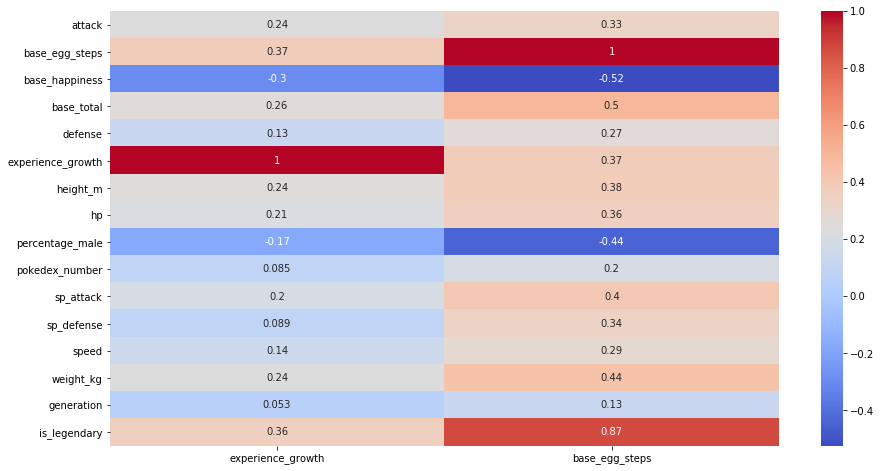

In [30]:

plt.figure(figsize=(15,8))
sns.heatmap(poke_df.corr()[['experience_growth', 'base_egg_steps']].iloc[18:], annot=True, cmap='coolwarm')

### Which type is the strongest overall? Which is the weakest?

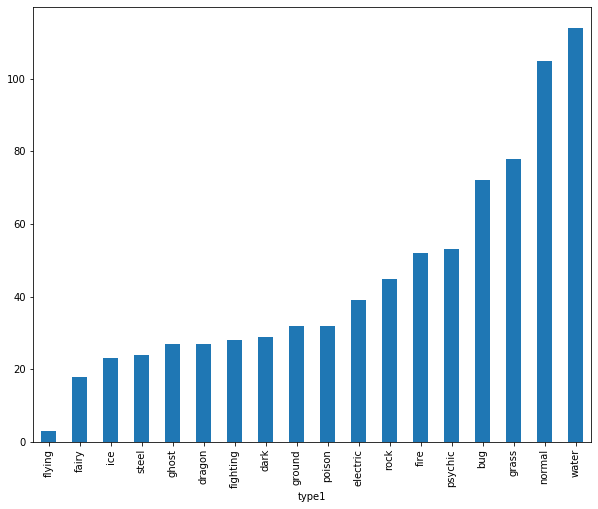

In [32]:
#Let's explore the type of pokemons
poke_df.groupby('type1')['type1'].count().sort_values().plot(kind='bar', figsize=(10,8))

In [33]:
#To determine the strength of a pokemon, we must compare the base_total column
base_type = poke_df.groupby('type1')['base_total'].mean().sort_values()
base_type

type1
bug         380.430556
poison      399.562500
normal      401.295238
grass       412.576923
fighting    414.821429
ground      426.093750
water       426.789474
fairy       427.166667
ice         433.608696
ghost       434.703704
electric    436.153846
rock        447.266667
dark        449.758621
fire        450.634615
flying      453.333333
psychic     461.264151
steel       491.583333
dragon      522.777778
Name: base_total, dtype: float64

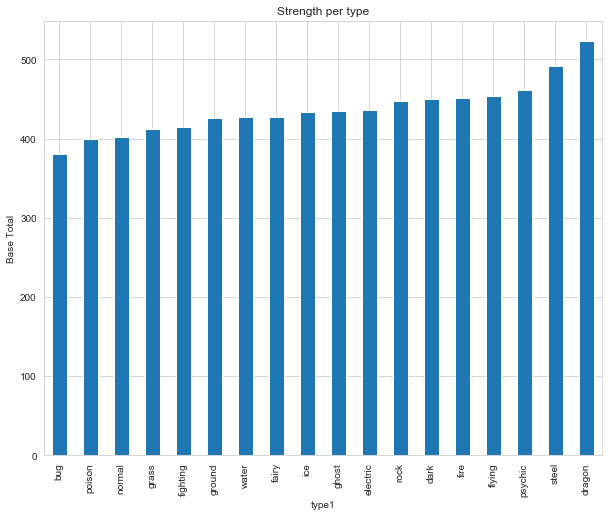

In [34]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
plt.ylabel('Base Total')
plt.title('Strength per type') 
base_type.plot(kind='bar')

### Which type is the most likely to be a legendary Pokemon?

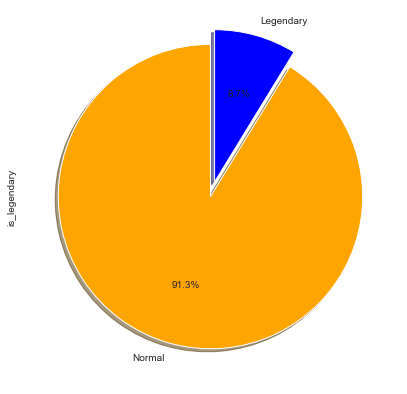

In [35]:
#Let's explore the legendary pokemons a bit
poke_df['is_legendary'].value_counts().plot(kind='pie',
                                            autopct='%1.1f%%',
                                            labels= ['Normal','Legendary'],
                                            shadow=True,
                                            colors=['orange','blue'],
                                            figsize=(7,7),
                                            startangle=90,
                                            explode=[0,0.1])

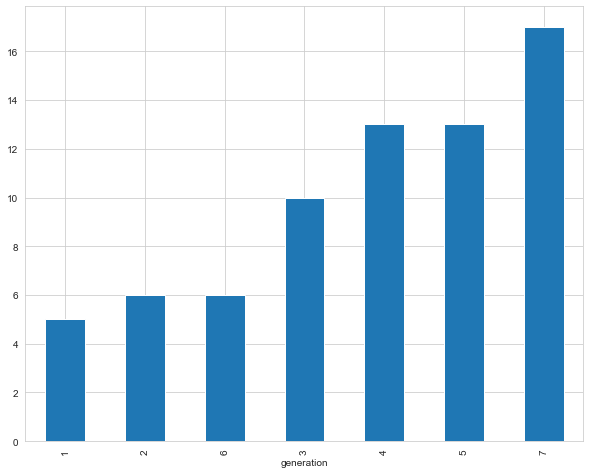

In [36]:
poke_df[poke_df['is_legendary']==1].groupby('generation')['is_legendary'].count().sort_values().plot(kind='bar', figsize=(10,8))

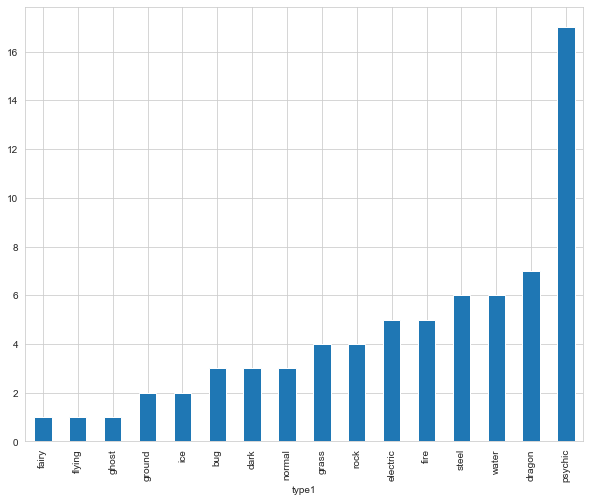

In [37]:
poke_df[poke_df['is_legendary']==1].groupby('type1')['is_legendary'].count().sort_values().plot(kind='bar', figsize=(10,8))

# THE LEGENDARY POKEMON CLASSIFIER

In [38]:
#First we need to prepare some columns to feed into the classifier
poke_df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'weight_kg', 'generation',
       'is_legendary'],
      dtype='object')

In [39]:
poke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [40]:
df1 = pd.get_dummies(data=poke_df['type1'], drop_first=True)
poke_df.drop('type1', axis=1, inplace=True)
poke_df= pd.concat([poke_df,df1], axis=1)
poke_df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0,1,0,0,0,0,0,0,0,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0,1,0,0,0,0,0,0,0,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0,1,0,0,0,0,0,0,0,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X= poke_df.drop(['abilities','capture_rate','classfication','is_legendary','name','japanese_name'], axis=1)
y= poke_df['is_legendary']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(X_train,y_train)

C:\Users\Shivam Shandilya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
predictions= lr.predict(X_test)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
#Evaluating the model's performance
print('Confusion Matrix of the Model')
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print('Classification Report of the Model')
print('\n')
print(classification_report(y_test,predictions))

Confusion Matrix of the Model


[[215   1]
 [  3  22]]


Classification Report of the Model


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       216
           1       0.96      0.88      0.92        25

    accuracy                           0.98       241
   macro avg       0.97      0.94      0.95       241
weighted avg       0.98      0.98      0.98       241



# POKEMON DREAM TEAM

DESCRIPTION:-A team of 6 Pokemons that inflicts the most damage while remaining relatively impervious to any other team of 6 Pokemons.

In [51]:
#We need to reimport the data as we had previously corrupted the original data for fitting into our model
poke_df = pd.read_csv('C:/Users/Shivam Shandilya/Desktop/pokemon/pokemon.csv')

In [52]:
#We have the base_total column in the dataframe which evaluates the strength of a Pokemon
# We can actually form the dream team by grouping the strongest 6 Pokemons irrespective of their type

In [54]:
team = poke_df.sort_values(by='base_total', ascending=False).head(6)
team[['name','japanese_name','pokedex_number','type1','base_total','is_legendary']]

,name,japanese_name,pokedex_number,type1,base_total,is_legendary
149,Mewtwo,Mewtwoミュウツー,150,psychic,780,1
383,Rayquaza,Rayquazaレックウザ,384,dragon,780,1
382,Groudon,Groudonグラードン,383,ground,770,1
381,Kyogre,Kyogreカイオーガ,382,water,770,1
492,Arceus,Arceusアルセウス,493,normal,720,1
717,Zygarde,Zygarde (10% Forme)ジガルデ,718,dragon,708,1


THIS IS OUR POKEMON DREAM TEAM.

# WORK DONE BY TEAM:- V FOR VENDETTA.